# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = mouse_metadata.rename(columns={'"Mouse ID"':'Mouse ID'}, inplace=True) 
mouse_complete = pd.merge(mouse_metadata, study_results, how= 'left', on=["Mouse ID"])

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
# Display # of unique Mice IDs and then calc of the length of that list for # of unique mice tested
print(len(mouse_complete.value_counts(["Mouse ID"])))

249


In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Code from pandas documentation 

# Dropped any rows duplicated across all columns 

munique = mouse_complete.drop_duplicates(keep='last')

In [73]:
mouse_complete[mouse_complete.duplicated(['Mouse ID' and 'Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
munique.value_counts(["Mouse ID", "Timepoint"])

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
a203      0            1
                      ..
i334      15           1
          10           1
          5            1
          0            1
z969      45           1
Name: count, Length: 1888, dtype: int64

In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Dropped in previous step; viewing here
munique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice in the clean DataFrame.
# Number of unique mice number the same as we didn't drop Mice IDs, just rows of duplicated data
len(munique.value_counts(["Mouse ID"]))

249

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
med_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
var_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
std_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
sem_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

summ_munique = pd.concat([mean_munique, med_munique, var_munique, std_munique, sem_munique],axis=1,sort=False)
summ_munique.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std.Dev.", "Tumor Volume Std. Err."]
summ_munique

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

munique.groupby('Tumor Volume (mm3)').agg(['Drug Regimen','mean', 'med', 'var', 'std', 'sem'])

AttributeError: 'SeriesGroupBy' object has no attribute 'Drug Regimen'

## Bar and Pie Charts

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_num = munique.groupby(["Drug Regimen"])["Timepoint"].count().reset_index(name = '# Timepoints')
drug_num

,Drug Regimen,# Timepoints
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,160
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


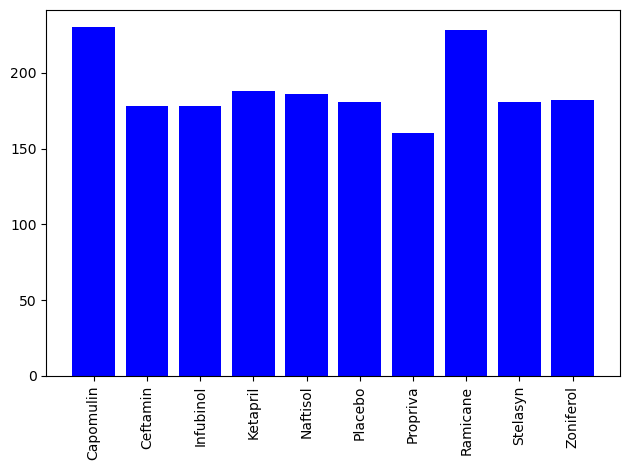

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_num))
tick_locations = [value for value in x_axis]

plt.ylabel = ("# of Observed Mouse Timepoints")
plt.xlabel = ("Drug Regimen")
plt.title = ("Mice Tested vs. Drug Tested")

plt.bar(x_axis, drug_num["# Timepoints"], color='b', align='center')
plt.xticks(tick_locations, drug_num["Drug Regimen"], rotation="vertical")
plt.tight_layout()

plt.show()

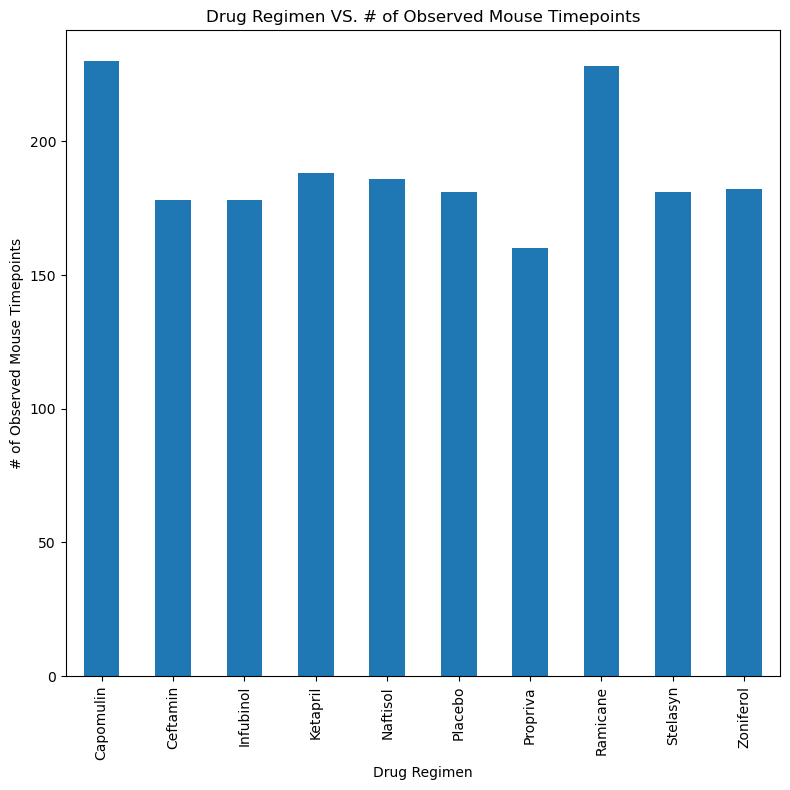

In [81]:
drug_num.plot(kind="bar", x="Drug Regimen", y="# Timepoints", figsize=(8,8), title="Drug Regimen VS. # of Observed Mouse Timepoints", ylabel= "# of Observed Mouse Timepoints", legend=None)
plt.tight_layout()
plt.show()

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_sex = munique.groupby(["Sex"])["Sex"].value_counts()
drug_sex

Sex
Female    934
Male      958
Name: count, dtype: int64

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Female", "Male"] 
sexcount = [930, 958]
colors = ["blue","orange"]
explode =(0,0)

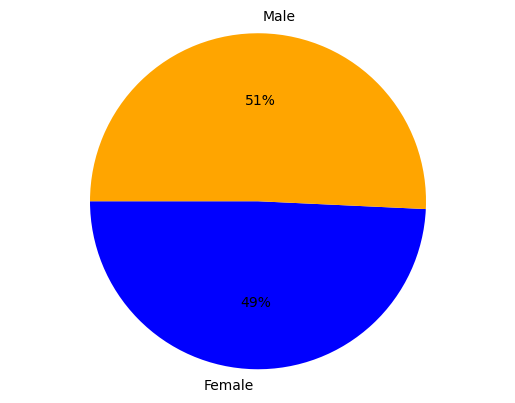

In [84]:
plt.pie(sexcount, explode = explode, labels = sexes, colors = colors, autopct="%1.0f%%", shadow=False, startangle=180)
plt.axis("equal")
plt.show()

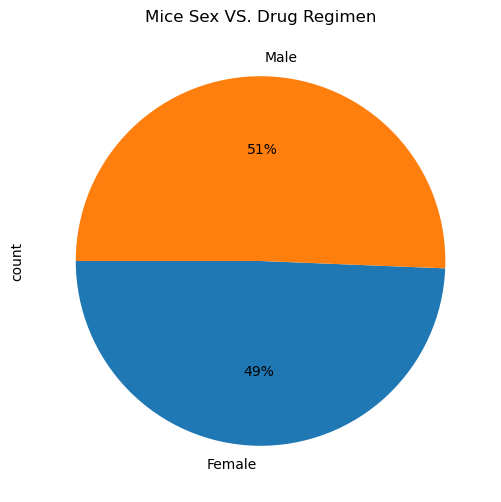

In [85]:
drug_sex.plot(kind="pie", x=sexes, y="Mouse Total", autopct='%1.0f%%', startangle=180, figsize=(6,6), title="Mice Sex VS. Drug Regimen")
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#munique_clean = munique.drop_duplicates(subset=["Mouse ID"], keep="last") [considered this code; can't guarantee last = latest so dropped]

# Start by getting the last (greatest) timepoint for each mouse

fintumvol = munique.groupby(["Mouse ID"])['Timepoint'].max()
fintumvol = fintumvol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
munique_combo = pd.merge(fintumvol, study_results, how="left", on=["Mouse ID", "Timepoint"])
munique_combo.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,67.973419,2
1,a251,45,65.525743,1
2,a262,45,70.717621,4
3,a275,45,62.999356,3
4,a366,30,63.440686,1


In [104]:
drug_vol = munique.loc[munique['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_vol.head()
#drop rows w/ other drugs as only interested across the 4 drugs 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


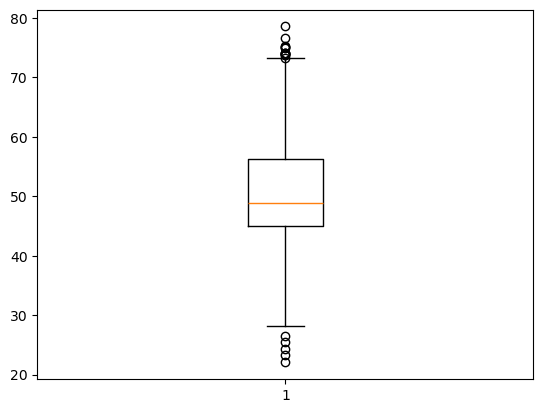

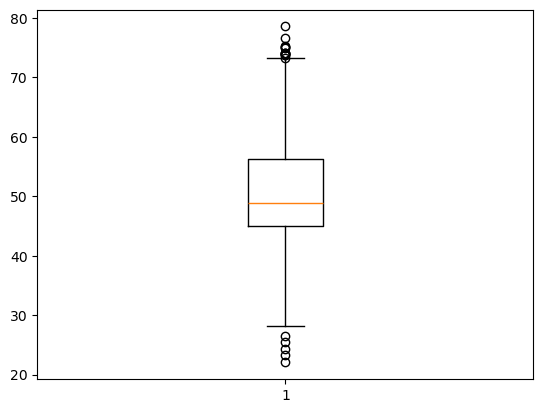

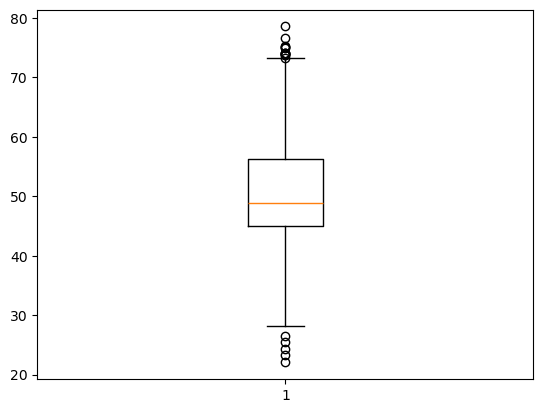

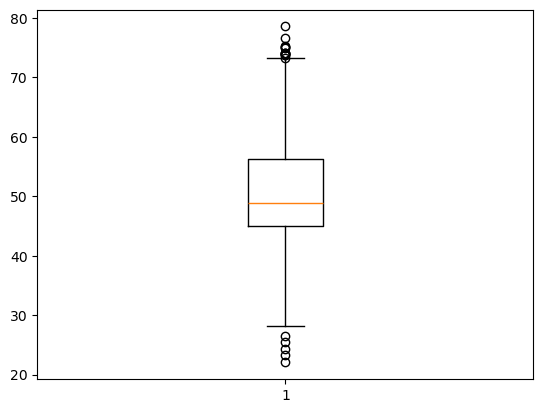

In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = munique["Tumor Volume (mm3)"]

for treatment in treatments:
       plt.figure()
       plt.boxplot(tumor_vol)
       plt.show



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

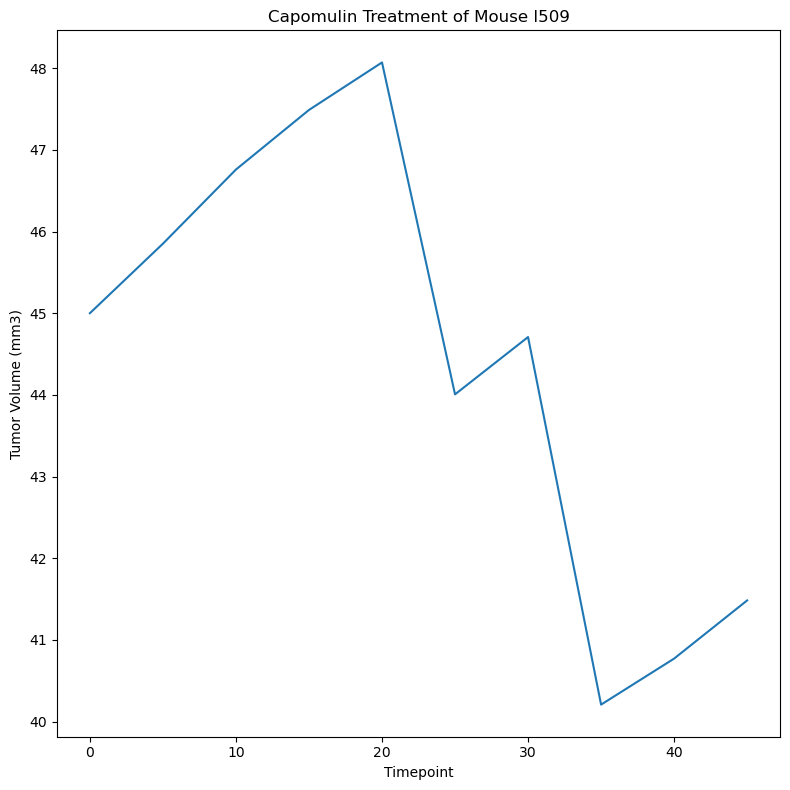

In [109]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

indivm = munique[munique["Mouse ID"] == "l509"]

indivm.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", figsize=(8,8), title="Capomulin Treatment of Mouse l509", ylabel= "Tumor Volume (mm3)", legend=None)
plt.tight_layout()
plt.show

In [113]:
capo = drug_vol[drug_vol["Drug Regimen"] == "Capomulin"]
#capo_tavwei = capo.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean()
#capo= capo.reset_index()
#capo_tavwei
capo

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


<Axes: title={'center': 'Drug Capomulin Weight VS. Average Tumor Volume'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

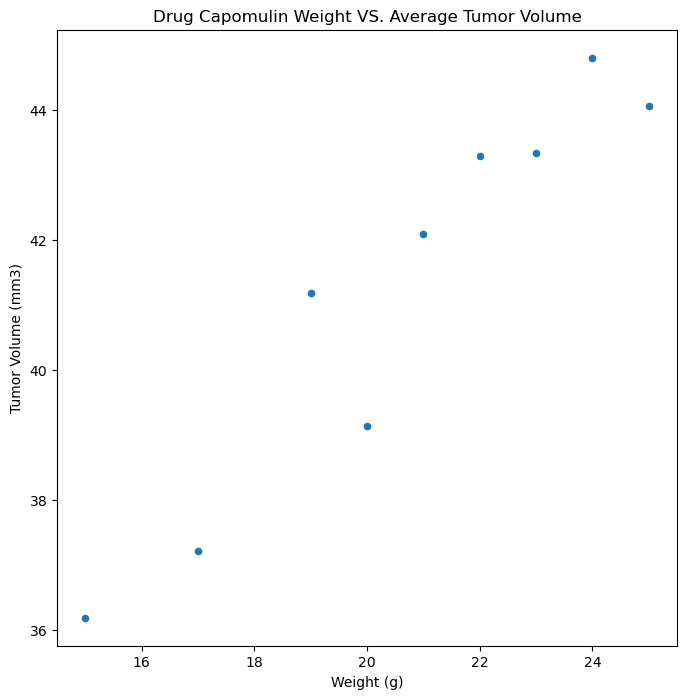

In [107]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#capo = drug_vol[drug_vol["Drug Regimen"] == "Capomulin"]

capo_tavwei.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(8,8), title="Drug Capomulin Weight VS. Average Tumor Volume")

In [131]:
capo_tum_wei = capo.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
capo_clean = capo_tum_wei.reset_index()
capo_clean

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


<function matplotlib.pyplot.show(close=None, block=None)>

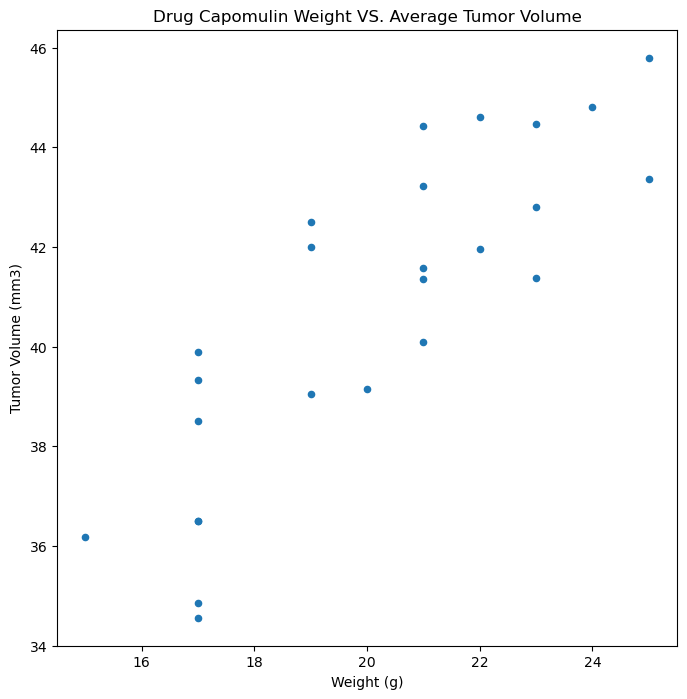

In [132]:
capo_clean.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(8,8), title="Drug Capomulin Weight VS. Average Tumor Volume")
plt.show

<Axes: title={'center': 'Drug Capomulin Weight VS. Average Tumor Volume'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

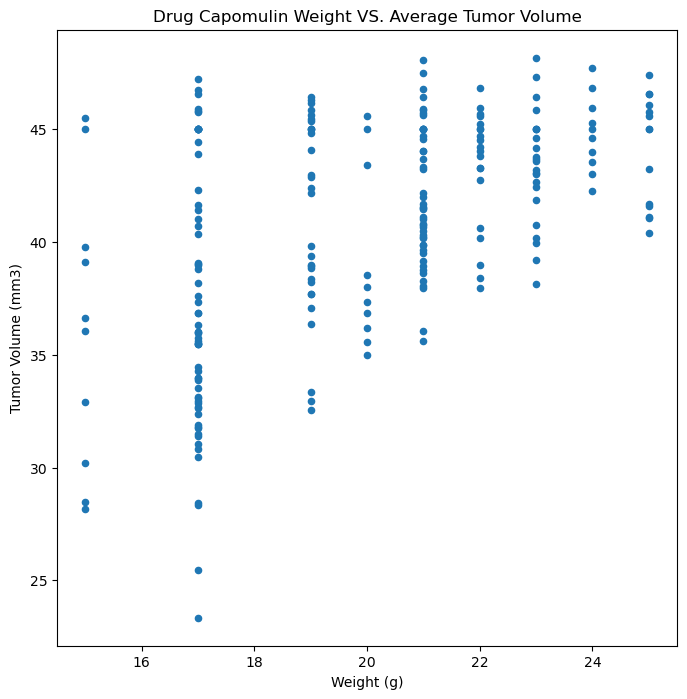

In [111]:
capo.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(8,8), title="Drug Capomulin Weight VS. Average Tumor Volume")

## Correlation and Regression

The r-squared is: 0.7686134812139006


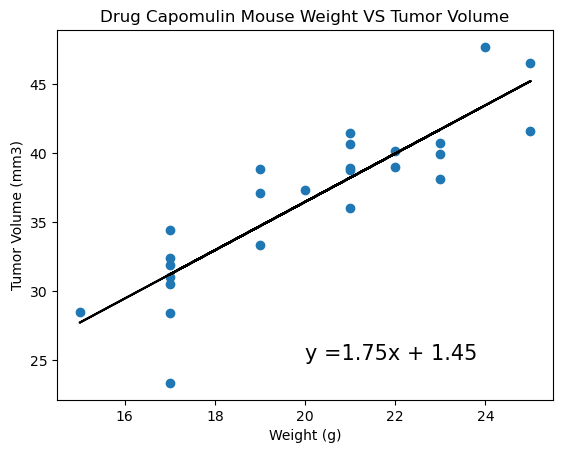

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = capo["Weight (g)"]
y_values = capo["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "k-")
plt.annotate(line_eq,(20,25), fontsize=15,color="black")
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Drug Capomulin Mouse Weight VS Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()

